Electric Propulsion Test Code #1

In [73]:
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd
import numpy as np

Inputs

In [74]:
data = pd.read_excel('Electric_Rockets_and_Solar_Panels.xlsx')
# based on the excel choose the row location of the one you want
iont = 3
hallt = 0
solarp = 6
# choose the amount of Ion and Hall thrusters
ionnumber = 1
hallnumber = 1
# choose the weight of the spacecraft
totalweight = 260000

In [75]:
# From Solar Panels
pp = data.iloc[solarp,1] # power per panel
spweight = data.iloc[solarp,2] # solar panel weight
paneleff = data.iloc[solarp,3] # this is in kW/m^3
panelnumber = 1 # choose the number of panels

In [76]:
# From Ion Thruster Chosen
ionisp = data.iloc[iont,1] # in s
ionthrust = data.iloc[iont,6]*(10**-3) # in mN so converting to N
ioneff = data.iloc[iont,3] # in %
ionfuelmw = data.iloc[iont,4] 
ionweight = data.iloc[iont,5] # in kg
ionmass = 2.18*10**-25 # in kg

# From Hall Thruster Chosen 
hallisp = data.iloc[hallt,1] # in s
hallthrust = data.iloc[hallt,6]*(10**-3) # in mN so converting to N
halleff = data.iloc[hallt,3] # in %
hallfuelmw = data.iloc[hallt,4] 
hallweight = data.iloc[hallt,5] # in kg

Electric Prop Equations

In [77]:
ge = 9.81 # earth gravity
a = 7.34*10**5 # q/m for xenon got it from the book (10^5 C/kg)
# Ion Thrusters
ionVa = ((ionisp*ge)**2)/(2*a)
ionEP = (ionthrust*ionisp*ge)/(2*ioneff)
ionI = ionEP/ionVa
ionUe = sqrt(2*a*ionVa)
ionmdot = (2*ionEP)/(ionUe**2)
# Hall Thrusters 
hallVa = ((hallisp*ge)**2)/(2*a)
hallEP = (hallthrust*hallisp*ge)/(2*halleff)
hallI = hallEP/hallVa
hallUe = sqrt(2*a*hallVa)
hallmdot = (2*hallEP)/(hallUe**2)
print(f"Ion Thruster Electric Power (ionEP): {ionEP*10**-3} kW")
print(f"Hall Thruster Electric Power (hallEP): {hallEP*10**-3} kW")

Ion Thruster Electric Power (ionEP): 6.928943142857144 kW
Hall Thruster Electric Power (hallEP): 109.31142857142859 kW


Get the Thrust

In [78]:
time = np.arange(0, 120)
ones_array = np.ones((120, 1))
# Choose how often hall thrusters are used in hours
halltime = 24*60*60 # in hours (so it fires once every hour right now)
# Ion total Thrust
iontotalthrust = ionthrust*ionnumber*ones_array

# Hall total Thrust
halltotalthrust = hallthrust*hallnumber*ones_array
#*time*halltime
# Total Thrust
totalthrust = (iontotalthrust + halltotalthrust)*ones_array

Get the Acceleration of the Spacecraft

In [79]:
# total weight of spacecraft
totalweight = totalweight+(ionweight*ionnumber)+(hallweight*hallnumber)

t = np.full((120, 1), totalweight)
# Ion total Accceleration
iontotalaccel = iontotalthrust/t
# Hall total Acceleration
halltotalaccel = halltotalthrust/t
# Total Acceleration
totalaccel = iontotalaccel+halltotalaccel

Get the Speed of the Spacecraft

In [80]:
initialv0 = 0 
# Ion total Speed
iontotalspeed =iontotalaccel*ionnumber*time*60*60*24
iontotalspeed = iontotalspeed.T
iontotalspeed= iontotalspeed[:,0]
# Hall total Speed
halltotalspeed = halltotalaccel*hallnumber*time*halltime
halltotalspeed = halltotalspeed.T
halltotalspeed = halltotalspeed[:,0]
# Total Speed
totalspeed = initialv0 + (iontotalspeed + halltotalspeed)

Cost

In [81]:
xenoncost = 12000 # in $/kg
# Ion total fuel cost
iontotalfuelcost = ionmdot*xenoncost*time*60*60*24
# Hall total fuel cost
halltotalfuelcost = hallmdot*xenoncost*time*halltime
# Total fuel cost
totalfuelcost = iontotalfuelcost + halltotalfuelcost

Graphs Against Time Depending on Number of Engines Chosen

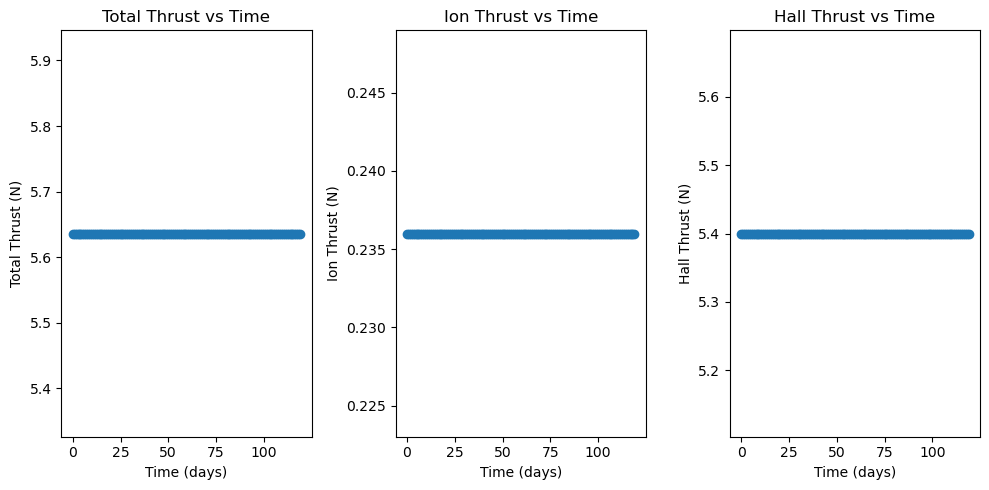

In [82]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Total Thrust
axs[0].scatter(time, totalthrust)
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('Total Thrust (N)')
axs[0].set_title('Total Thrust vs Time')

# Ion Thrust
axs[1].scatter(time, iontotalthrust)
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Ion Thrust (N)')
axs[1].set_title('Ion Thrust vs Time')

# Hall Thrust
axs[2].scatter(time, halltotalthrust)
axs[2].set_xlabel('Time (days)')
axs[2].set_ylabel('Hall Thrust (N)')
axs[2].set_title('Hall Thrust vs Time')

plt.tight_layout()
plt.show()

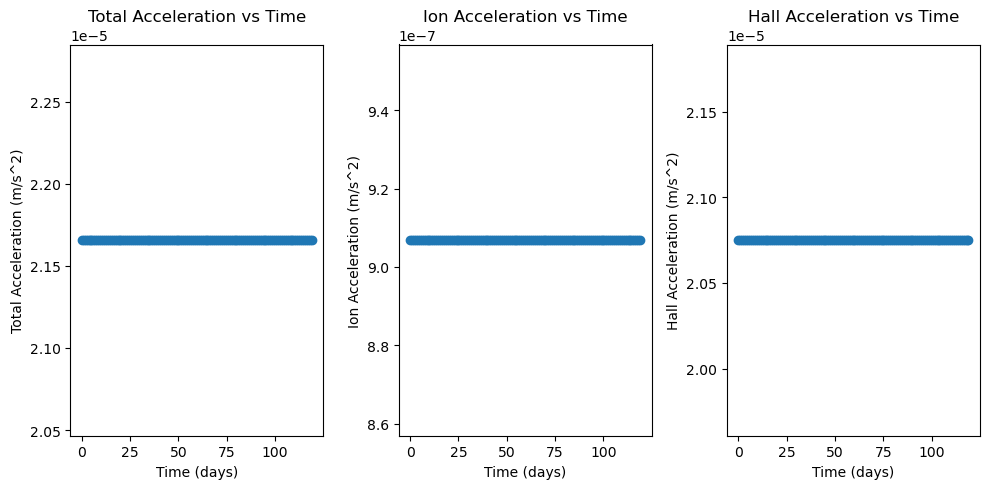

In [83]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Total Acceleration
axs[0].scatter(time, totalaccel)
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('Total Acceleration (m/s^2)')
axs[0].set_title('Total Acceleration vs Time')

# Ion Acceleration
axs[1].scatter(time, iontotalaccel)
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Ion Acceleration (m/s^2)')
axs[1].set_title('Ion Acceleration vs Time')

# Hall Acceleration
axs[2].scatter(time, halltotalaccel)
axs[2].set_xlabel('Time (days)')
axs[2].set_ylabel('Hall Acceleration (m/s^2)')
axs[2].set_title('Hall Acceleration vs Time')

plt.tight_layout()
plt.show()

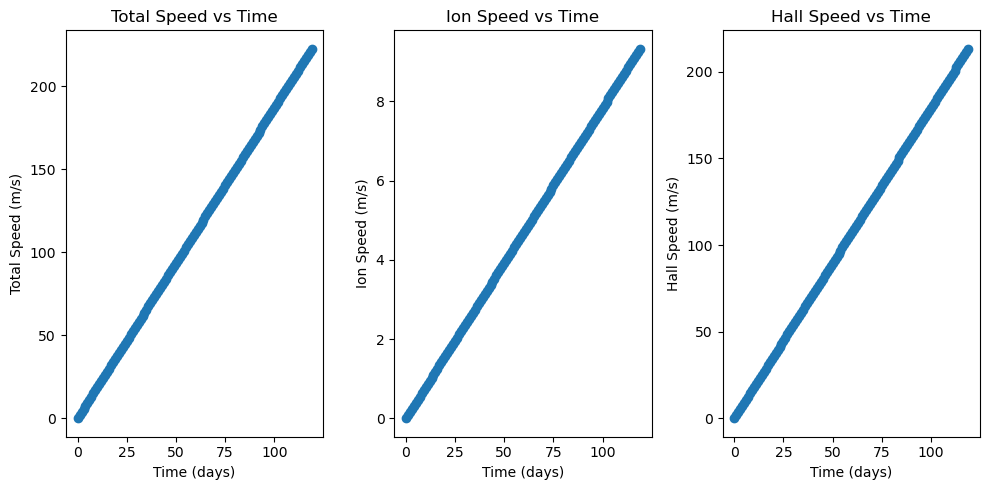

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Total Speed
axs[0].scatter(time, totalspeed)
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('Total Speed (m/s)')
axs[0].set_title('Total Speed vs Time')

# Ion Speed
axs[1].scatter(time, iontotalspeed)
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Ion Speed (m/s)')
axs[1].set_title('Ion Speed vs Time')

# Hall Speed
axs[2].scatter(time, halltotalspeed)
axs[2].set_xlabel('Time (days)')
axs[2].set_ylabel('Hall Speed (m/s)')
axs[2].set_title('Hall Speed vs Time')

plt.tight_layout()
plt.show()

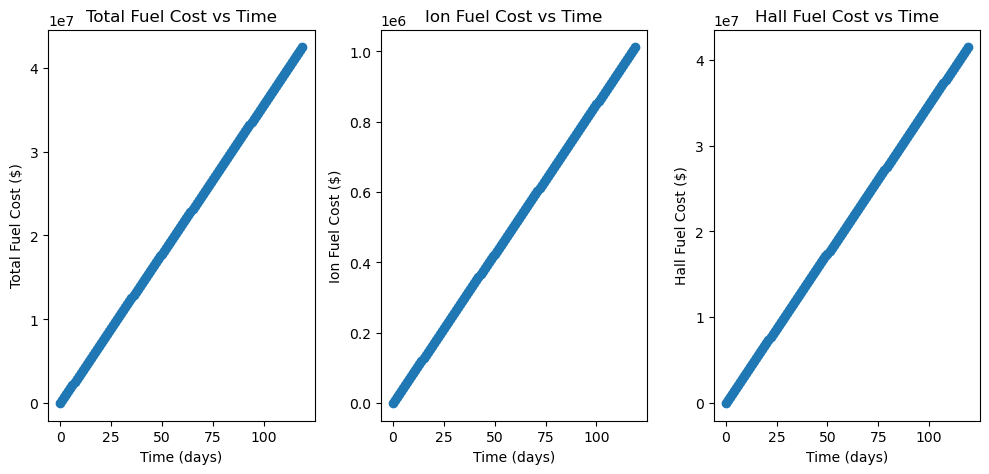

In [85]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Total Fuel Cost
axs[0].scatter(time, totalfuelcost)
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('Total Fuel Cost ($)')
axs[0].set_title('Total Fuel Cost vs Time')

# Ion Fuel Cost
axs[1].scatter(time, iontotalfuelcost)
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Ion Fuel Cost ($)')
axs[1].set_title('Ion Fuel Cost vs Time')

# Hall Fuel Cost
axs[2].scatter(time, halltotalfuelcost)
axs[2].set_xlabel('Time (days)')
axs[2].set_ylabel('Hall Fuel Cost ($)')
axs[2].set_title('Hall Fuel Cost vs Time')

plt.tight_layout()
plt.show()

In [86]:
from math import floor

total_solar_power = 2000  # in kW, adjust as needed

maxi = floor(total_solar_power / (ionEP * 10**-3))
maxh = floor(total_solar_power / (hallEP * 10**-3))

# Initialize variables to store the best results
lowest_cost = []
lowest_cost_combination = []
highest_speed = []
highest_speed_combination = []

for ion_num in range(0, maxi):  # Adjust the range as needed
    for hall_num in range(0, maxh):  # Adjust the range as needed
        # Calculate the total electric power required
        total_EP = (ionEP * 10**-3 * ion_num) + (hallEP * 10**-3 * hall_num)
        
        # Check if the total electric power is within the available solar power
        if total_EP <= total_solar_power:
            # Calculate the total thrust
            total_thrust = (ionthrust * ion_num) + (hallthrust * hall_num)
            
            # Calculate the total acceleration
            total_weight = totalweight + (ionweight * ion_num) + (hallweight * hall_num)
            total_accel = total_thrust / total_weight
            
            # Calculate the total speed
            total_speed = initialv0 + total_accel * time[-1] * 60 * 60 * 24
            
            # Calculate the total fuel cost
            total_fuel_cost = (ionmdot * ion_num + hallmdot * hall_num) * xenoncost * time[-1] * 60 * 60 * 24
            
            # Append the cost and combination to the lists
            lowest_cost.append(total_fuel_cost)
            lowest_cost_combination.append((ion_num, hall_num))
            
            # Append the speed and combination to the lists
            highest_speed.append(total_speed)
            highest_speed_combination.append((ion_num, hall_num))


In [87]:
max(highest_speed)
highest_speed_index = highest_speed.index(max(highest_speed))
highest_speed_combination[highest_speed_index]

(20, 17)